In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectPercentile, f_classif

using KBest features

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = datasets.load_iris()
X, y = iris.data, iris.target
print(X.shape)
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)

(150, 4)
(150, 2)


using F-test score

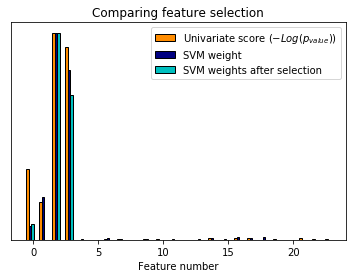

In [10]:
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# Add some noisy data to iris informative features
iris = datasets.load_iris()
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
X = np.hstack((iris.data, E))
y = iris.target
X_indices = np.arange(X.shape[-1])
# Univariate feature selection with F-test for feature scoring
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)
svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()
# PLOT
plt.figure(1)
plt.clf()
plt.bar(X_indices - .45, scores, width=.2,
label=r'Univariate score ($-Log(p_{value})$)',
color='darkorange', edgecolor='black')
plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
color='navy', edgecolor='black')
plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
width=.2, label='SVM weights after selection', color='c', edgecolor='black')
plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

comparing ranking criteria

In [11]:
#Comparison of F-test and mutual information
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)
mi = mutual_info_regression(X, y)
mi /= np.max(mi)
plt.figure(figsize=(15, 5))
for i in range(3):
plt.subplot(1, 3, i + 1)
plt.scatter(X[:, i], y, edgecolor='black', s=20)
plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
if i == 0: plt.ylabel("$y$", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),fontsize=16)
plt.show()

IndentationError: expected an indented block (<ipython-input-11-f41067e3708f>, line 12)